In [1]:
import os
# Mount Google Drive if running on Google Colab
try:
    from google.colab import drive
    mount_point = '/content/drive'
    drive.mount(mount_point)
    os.chdir(f'{mount_point}/MyDrive/swan_class/pythonaudio')
except ModuleNotFoundError:
    pass
print(f'The current working directory: \'{os.getcwd()}\'',)

The current working directory: 'D:\pythonaudio'


In [2]:
# Auto reload imported libraries
%load_ext autoreload
%autoreload 2

import librosa
import librosa.display
import soundfile as sf
from IPython.display import Audio
from scipy.io.wavfile import write
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from PIL import Image, ImageOps
from processors import AudioProcessor, ImageProcessor
import base64
import cv2

In [3]:
with open('image2audio_lambda/default.png', 'rb') as file:
    b64_file = base64.b64encode(file.read())

with open('test_img.png', 'wb') as file:
    file.write(base64.decodebytes(b64_file))

C:\users\harry\appdata\local\programs\python\python38\lib\site-packages\librosa\util\decorators.py:88: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  return f(*args, **kwargs)


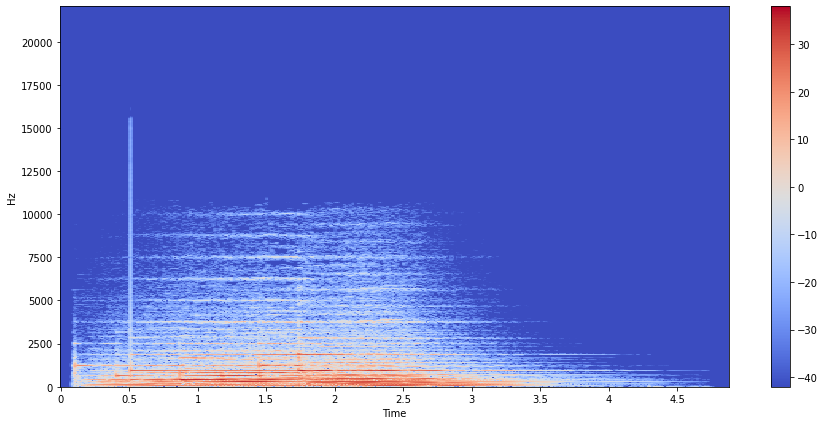

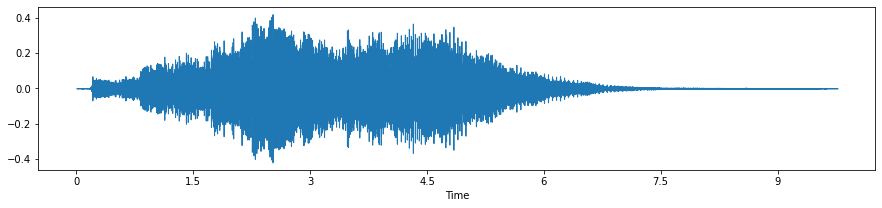

In [4]:
AudioProcessor().plot_spectrogram_from_file('audio/winxpstartup.wav')
plt.show()
AudioProcessor().plot_wave_from_file('audio/winxpstartup.wav')

In [4]:
def image_to_audio(image_path, save_path=None, rotate=0, padding=3, inverse_color=False, display_image=False, volume=1, plot_spectrogram=False):
    # Image processing
    ip = ImageProcessor()
    ip.load_image(image_path)
    ip.resize(600)
    if inverse_color:
        ip.inverse_color()
    if rotate:
        ip.rotate(rotate)
    ip.add_top_padding(padding)
    ip.flip()
    if display_image:
        ip.display_image()

    # Transform to Audio
    ap = AudioProcessor(44100)
    ap.load_image_form_array(ip.image_to_array())
    ap.image_to_spectrogram(inverse_transform=False)
    if plot_spectrogram:
        ap.plot_spectrogram()
    ap.spectrogram_to_wave()
    ap.normalize_audio()
    ap.change_volume(volume)
    ap.play_sound(save_path)

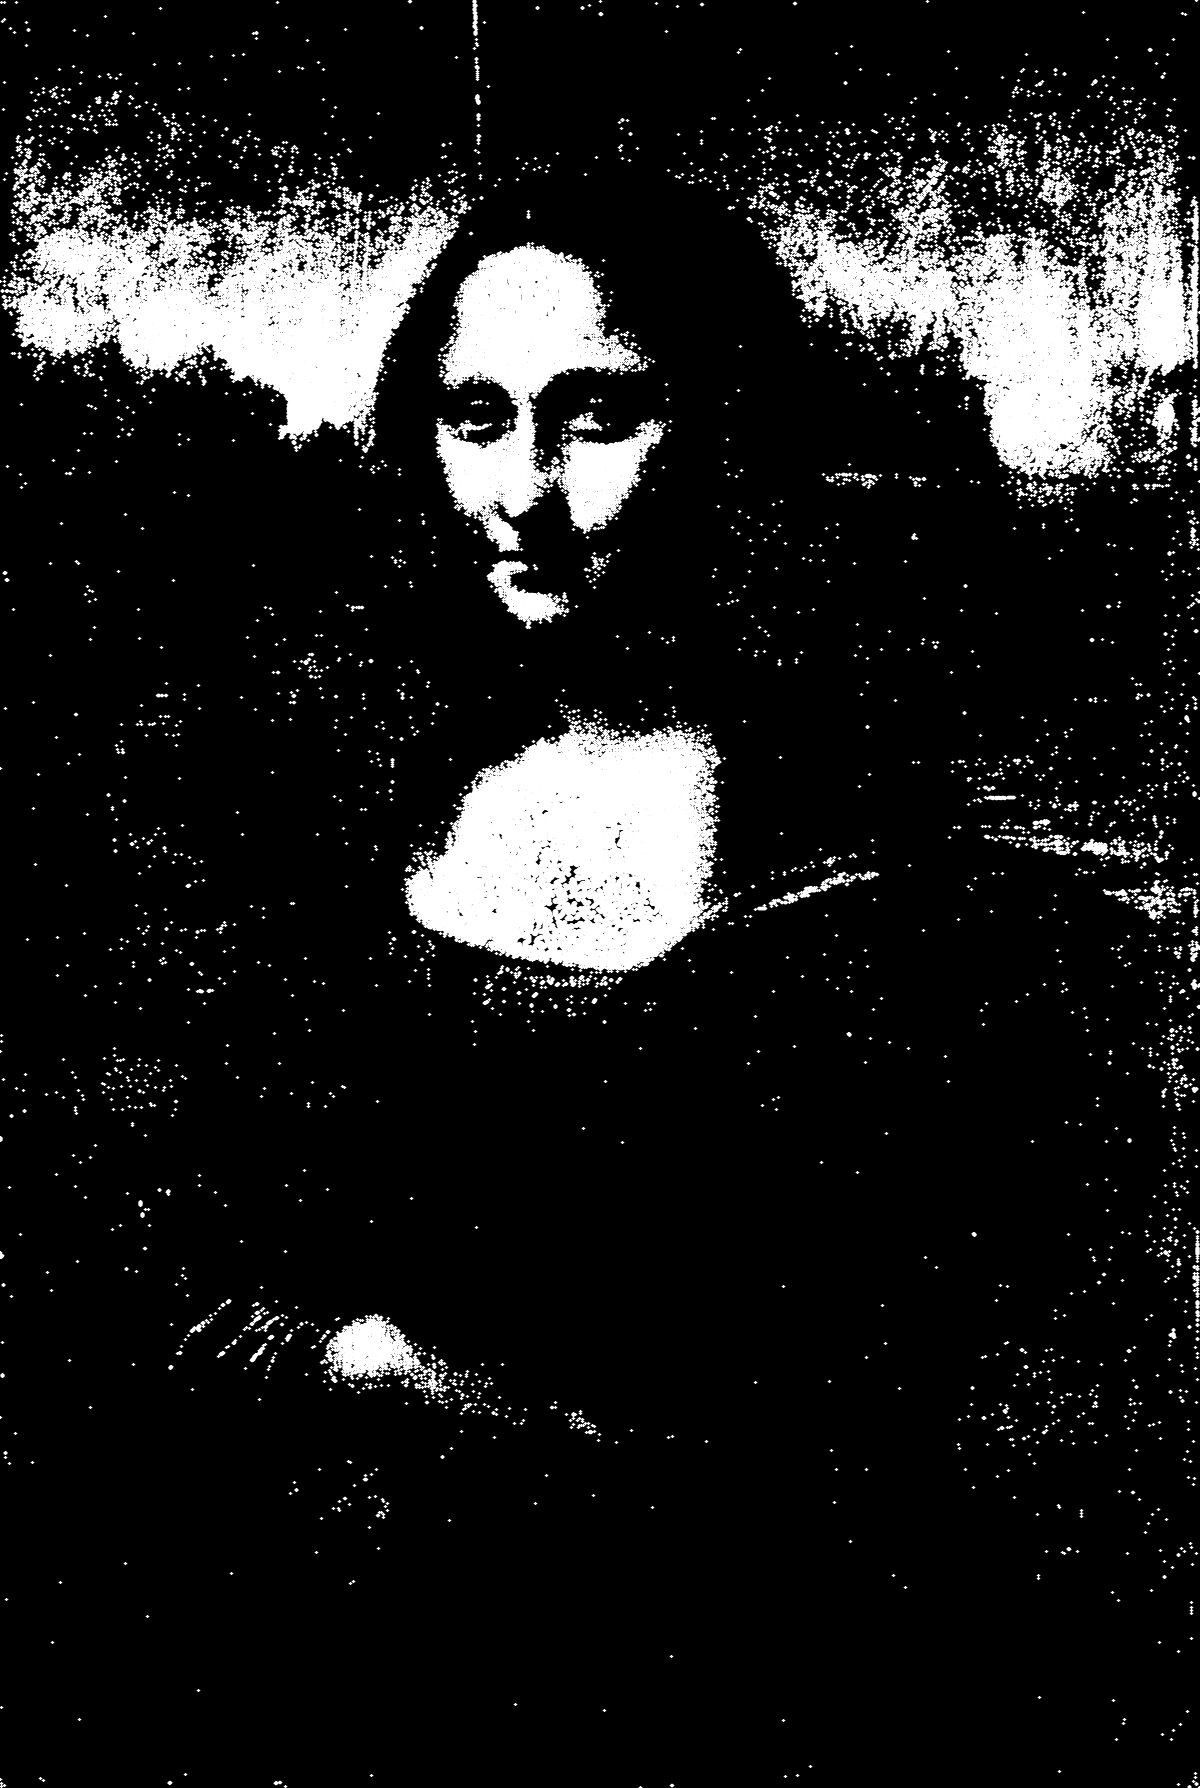

In [6]:
image = Image.open('image/Mona_Lisa.jpg')
image = np.array(image)
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)

image_copy = image.copy() * 0
cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(255, 255, 255), thickness=2, lineType=cv2.LINE_AA)
Image.fromarray(image_copy).save('image.png')
Image.fromarray(image_copy)

In [7]:
image_to_audio('image.png', plot_spectrogram=True)

AttributeError: can't set attribute

In [9]:
class CropLayer(object):
    def __init__(self, params, blobs):
        self.xstart = 0
        self.xend = 0
        self.ystart = 0
        self.yend = 0

    # Our layer receives two inputs. We need to crop the first input blob
    # to match a shape of the second one (keeping batch size and number of channels)
    def getMemoryShapes(self, inputs):
        inputShape, targetShape = inputs[0], inputs[1]
        batchSize, numChannels = inputShape[0], inputShape[1]
        height, width = targetShape[2], targetShape[3]

        self.ystart = (inputShape[2] - targetShape[2]) // 2
        self.xstart = (inputShape[3] - targetShape[3]) // 2
        self.yend = self.ystart + height
        self.xend = self.xstart + width

        return [[batchSize, numChannels, height, width]]

    def forward(self, inputs):
        return [inputs[0][:,:,self.ystart:self.yend,self.xstart:self.xend]]

In [14]:
# cv2.dnn_registerLayer('Crop', CropLayer)
net = cv2.dnn.readNet('edge_detection_model/deploy.prototxt', 'edge_detection_model/hed_pretrained_bsds.caffemodel')

In [15]:
ip = ImageProcessor()
ip.load_image('image/b.png', mode=None)
ip.resize()
image_array = ip.image_array

In [12]:
inp = cv2.dnn.blobFromImage(image_array, scalefactor=1.0, mean=(104.00698793, 116.66876762, 122.67891434), swapRB=False, crop=False)
net.setInput(inp)
out = net.forward()

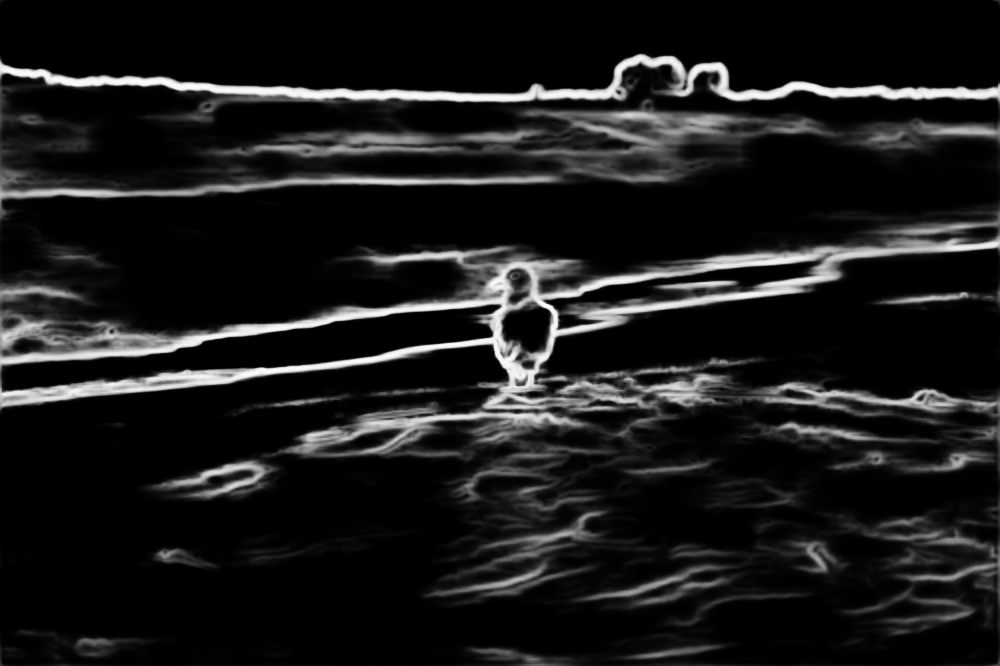

In [13]:
out = out[0, 0]
# out = cv2.resize(out, (image_array.shape[1], image_array.shape[0]))
out = 255 * out
out = out.astype(np.uint8)
# out = cv2.cvtColor(out,cv2.COLOR_GRAY2BGR)
# con=np.concatenate((image_array,out),axis=1)
Image.fromarray(out)
# con

In [ ]:
ip = ImageProcessor()
ip.load_image('image/b.png')
ip.resize()
ip.edge_detection()
ip.edge_detected_image

In [ ]:
%%timeit
a=1

In [ ]:
image = Image.open('image/b.png')
image = np.array(image)
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)

image_copy = image.copy() * 0
cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(255, 255, 255), thickness=2, lineType=cv2.LINE_AA)
Image.fromarray(image_copy).save('image.png')
Image.fromarray(image_copy)

In [ ]:
inp = cv2.dnn.blobFromImage(image_array, scalefactor=1.0,
                            mean=(104.00698793, 116.66876762, 122.67891434),
                            swapRB=False, crop=False)
net.setInput(inp)
out = net.forward()

In [ ]:
image_to_audio('image/b.png', plot_spectrogram=True, padding=0, inverse_color=True)

In [ ]:
path = 'image/paint.png'
ip = ImageProcessor()
ip.load_image(path)
ip.resize(600)
size = ip.image.size
ip.add_top_padding(5)
# ip.rotate(-90)
# ip.image = ip.image.resize(size)
ip.flip()
# ip.inverse_color()
ip.display_image()

In [ ]:
image = Image.open('spectrogram/b.png')
image = np.array(image)
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)

image_copy = image.copy() * 0
cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(255, 255, 255), thickness=2, lineType=cv2.LINE_AA)
Image.fromarray(image_copy).save('image.png')
Image.fromarray(image_copy)

In [ ]:
image_to_audio('image.png', plot_spectrogram=True)

In [ ]:
image_to_audio('spectrogram/b.png', plot_spectrogram=True, padding=0, inverse_color=True)

In [ ]:
path = 'spectrogram/paint.png'
ip = ImageProcessor()
ip.load_image(path)
ip.resize(600)
size = ip.image.size
ip.add_top_padding(5)
# ip.rotate(-90)
# ip.image = ip.image.resize(size)
ip.flip()
# ip.inverse_color()
ip.display_image()

In [ ]:
ap = AudioProcessor(44100)
ap.load_image_form_array(ip.image_to_array())
ap.image_to_spectrogram(inverse_transform=False)
ap.plot_spectrogram()
ap.spectrogram_to_wave()
ap.normalize_audio()
ap.change_volume(0.1)
ap.play_sound('audio/paint.wav')

In [ ]:
pad = 2
size = ip.image.size
image = ImageOps.pad(ip.image, (size[0], int(size[1]*pad)), centering=(0.5, 1))
# image = image.resize(size)
image